# classify Reuters newswires into 46 mutually exclusive topics

In [1]:
# 預防錯誤： OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# loading the reuters newswire dataset

from keras.datasets import reuters

# train_data: nparray of lists , train_label: ndarray of int64
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 5s 2us/step


In [3]:
# decode and print out the first review

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

557056/550378 [==============================] - 2s 4us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension)) 
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
# 除了如上頭自己寫函式之外，可以直接用keras提供的工具
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# 建立網路：二層，每層16個神經元，使用relu做為啟動函數，用類型交換熵做損失函數

from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# 從訓練集中再劃分一塊做為驗證集

x_val = x_train[:1000] 
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

In [9]:
# 訓練模型

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 319us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 155us/step - loss: 1.0952 - acc: 0.7652 - val_loss: 1.1706 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.8696 - acc: 0.8160 - val_loss: 1.0795 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.7032 - acc: 0.8477 - val_loss: 0.9845 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.5666 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.4583 - a

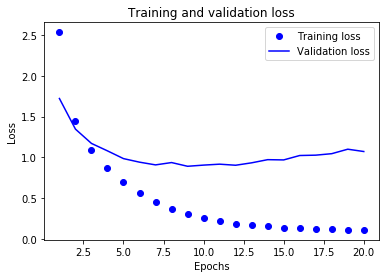

In [11]:
# plot the training and validation loss

import matplotlib.pyplot as plt

# history_dict has keys: 'acc', 'loss', 'val_acc', 'val_loss'
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)


# “bo” is for “blue dot.”
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
# “b” is f or “solid blue line.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')  
plt.legend()

plt.show()

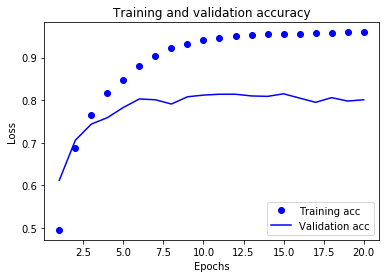

In [12]:
# plot training and validation accuracy
plt.clf()

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

In [13]:
# 差不多在第9次時開始overfit，所以重做訓練

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 266us/step - loss: 0.1346 - acc: 0.9555 - val_loss: 1.1075 - val_acc: 0.7980
Epoch 2/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.1030 - acc: 0.9580 - val_loss: 1.1334 - val_acc: 0.7990
Epoch 3/9
7982/7982 [==============================] - 1s 145us/step - loss: 0.1021 - acc: 0.9585 - val_loss: 1.1050 - val_acc: 0.7950
Epoch 4/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.1017 - acc: 0.9574 - val_loss: 1.1291 - val_acc: 0.7980
Epoch 5/9
7982/7982 [==============================] - 1s 144us/step - loss: 0.0963 - acc: 0.9592 - val_loss: 1.1523 - val_acc: 0.8010
Epoch 6/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.0979 - acc: 0.9565 - val_loss: 1.2360 - val_acc: 0.7900
Epoch 7/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.0953 - acc: 0.9574 - val_loss: 1.1831 - val_acc: 0.7950
Epoch 8

In [15]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 182us/step
[1.3548660246474553, 0.7827248442204849]


In [23]:
# use trained model to predict first 10 reviews in test dataset

y_hat_test = model.predict(x_test[0:10])
for y_hat in y_hat_test:
    print(np.where(y_hat == np.amax(y_hat))[0])


[3]
[10]
[1]
[4]
[13]
[3]
[3]
[3]
[3]
[3]
